<a href="https://colab.research.google.com/github/ashuGulati/fastai/blob/master/fastai_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the drive and using it as a file system


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

importing the fastai libraries


In [0]:
from fastai.vision import *

In [0]:
from fastai.metrics import error_rate

setting up path for the dataset folder in drive


In [0]:
path = Path(base_dir + 'data/')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

the folder_name is the label of the training dataset


In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/orange'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/apple')]

In [0]:
doc(ImageDataBunch)

imagedatabunch takes the label names from the folder, with 20% as validation data, size of images as 224 and batch size as 16


In [0]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=224, bs=16)

In [0]:
data.classes

['apple', 'orange']

to view the data set

In [0]:
data.show_batch(rows=5, figsize=(20,6))

training
specifying the type of nn i.e. cnn
the path to data, type of model, and metric

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


training starts


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

to train with any no of epochs i.e. the no. of cycles through the data
fine-tuning by adding extra layers at the end thru tranfer learning
unfreeze() func trains the whole model again!

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.003847,0.311114,0.111111,00:00
1,0.040799,0.258508,0.055556,00:00
2,0.036587,0.263433,0.055556,00:00
3,0.037586,0.194766,0.055556,00:00
4,0.028835,0.131333,0.055556,00:00
5,0.023068,0.086577,0.055556,00:00
6,0.025436,0.052070,0.055556,00:00
7,0.037347,0.053967,0.055556,00:00
8,0.031746,0.049651,0.055556,00:00
9,0.027312,0.060795,0.055556,00:00


In [0]:
learn.summary

to save the model which can be loaded later with learn.load('stage-1')


In [0]:
learn.save('stage-1')

to interpret the top losses

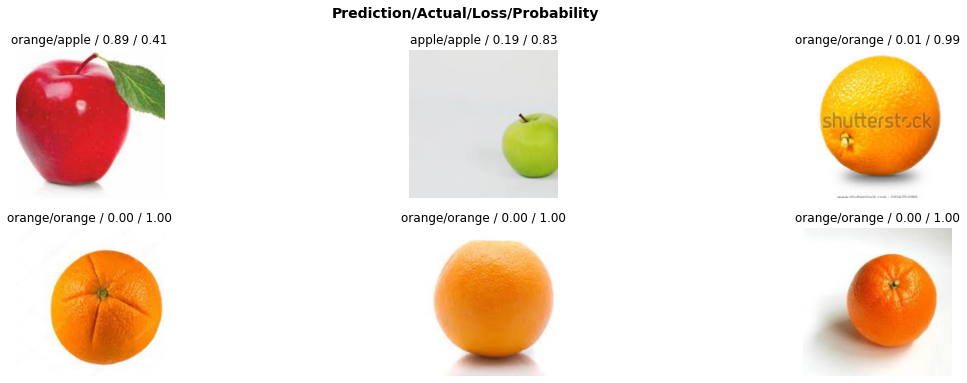

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
#losses,idxs = interp.top_losses()

#len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(6, heatmap=True, figsize=(20,6))

plotting the confusion matrix


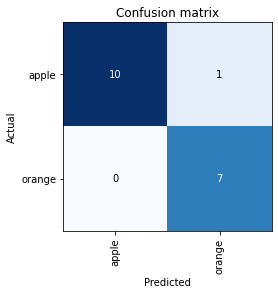

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('apple', 'orange', 1)]

In [0]:
data.c

2

finding the learning rate

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

Lesson 1 Notes


In [0]:
#https://forums.fast.ai/t/deep-learning-lesson-1-notes/27748

#https://forums.fast.ai/t/faq-resources-and-official-course-updates/27934